In [1]:
import pandas as pd
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
names = np.array(['openscope_calcium/758519303/758519303_78', 'openscope_calcium/758519303/758519303_83', 'openscope_calcium/758519303/758519303_80', 'openscope_calcium/758519303/758519303_77', 'openscope_calcium/758519303/758519303_87', 'openscope_calcium/758519303/758519303_76', 'openscope_calcium/758519303/758519303_2', 'openscope_calcium/758519303/758519303_36', 'openscope_calcium/758519303/758519303_17', 'openscope_calcium/758519303/758519303_27', 'openscope_calcium/758519303/758519303_3', 'openscope_calcium/758519303/758519303_9', 'openscope_calcium/758519303/758519303_59', 'openscope_calcium/758519303/758519303_21', 'openscope_calcium/758519303/758519303_47', 'openscope_calcium/758519303/758519303_46', 'openscope_calcium/758519303/758519303_93', 'openscope_calcium/758519303/758519303_16', 'openscope_calcium/758519303/758519303_63', 'openscope_calcium/758519303/758519303_41', 'openscope_calcium/758519303/758519303_23', 'openscope_calcium/758519303/758519303_86', 'openscope_calcium/758519303/758519303_90', 'openscope_calcium/758519303/758519303_39', 'openscope_calcium/758519303/758519303_55', 'openscope_calcium/758519303/758519303_72', 'openscope_calcium/758519303/758519303_68', 'openscope_calcium/758519303/758519303_33', 'openscope_calcium/758519303/758519303_51', 'openscope_calcium/758519303/758519303_42', 'openscope_calcium/758519303/758519303_79', 'openscope_calcium/758519303/758519303_18', 'openscope_calcium/758519303/758519303_69', 'openscope_calcium/758519303/758519303_19', 'openscope_calcium/758519303/758519303_56', 'openscope_calcium/758519303/758519303_95', 'openscope_calcium/758519303/758519303_20', 'openscope_calcium/758519303/758519303_48', 'openscope_calcium/758519303/758519303_66', 'openscope_calcium/758519303/758519303_29', 'openscope_calcium/758519303/758519303_92', 'openscope_calcium/758519303/758519303_82', 'openscope_calcium/758519303/758519303_14', 'openscope_calcium/758519303/758519303_53', 'openscope_calcium/758519303/758519303_81', 'openscope_calcium/758519303/758519303_74', 'openscope_calcium/758519303/758519303_73', 'openscope_calcium/758519303/758519303_57', 'openscope_calcium/758519303/758519303_65', 'openscope_calcium/758519303/758519303_88', 'openscope_calcium/758519303/758519303_91', 'openscope_calcium/758519303/758519303_11', 'openscope_calcium/758519303/758519303_64', 'openscope_calcium/758519303/758519303_31', 'openscope_calcium/758519303/758519303_75', 'openscope_calcium/758519303/758519303_44', 'openscope_calcium/758519303/758519303_1', 'openscope_calcium/758519303/758519303_32', 'openscope_calcium/758519303/758519303_38', 'openscope_calcium/758519303/758519303_4', 'openscope_calcium/758519303/758519303_62', 'openscope_calcium/758519303/758519303_25', 'openscope_calcium/758519303/758519303_85', 'openscope_calcium/758519303/758519303_45', 'openscope_calcium/758519303/758519303_60', 'openscope_calcium/758519303/758519303_0', 'openscope_calcium/758519303/758519303_7', 'openscope_calcium/758519303/758519303_13', 'openscope_calcium/758519303/758519303_50', 'openscope_calcium/758519303/758519303_70', 'openscope_calcium/758519303/758519303_71', 'openscope_calcium/758519303/758519303_58', 'openscope_calcium/758519303/758519303_61', 'openscope_calcium/758519303/758519303_40', 'openscope_calcium/758519303/758519303_67', 'openscope_calcium/758519303/758519303_35', 'openscope_calcium/758519303/758519303_30', 'openscope_calcium/758519303/758519303_10', 'openscope_calcium/758519303/758519303_15', 'openscope_calcium/758519303/758519303_8', 'openscope_calcium/758519303/758519303_5', 'openscope_calcium/758519303/758519303_24', 'openscope_calcium/758519303/758519303_28', 'openscope_calcium/758519303/758519303_37', 'openscope_calcium/758519303/758519303_89', 'openscope_calcium/758519303/758519303_6', 'openscope_calcium/758519303/758519303_94', 'openscope_calcium/758519303/758519303_34', 'openscope_calcium/758519303/758519303_84', 'openscope_calcium/758519303/758519303_49', 'openscope_calcium/758519303/758519303_22', 'openscope_calcium/758519303/758519303_12', 'openscope_calcium/758519303/758519303_52', 'openscope_calcium/758519303/758519303_54', 'openscope_calcium/758519303/758519303_26', 'openscope_calcium/758519303/758519303_43'])

## Test: single sess

In [4]:
np.where(names == "openscope_calcium/758519303/758519303_0")

(array([65]),)

In [2]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
#file_name = "sub-433451_ses-824434038_obj-raw_behavior+image+ophys.nwb"
file_name = "sub-433458_ses-826659257_obj-raw_behavior+image+ophys.nwb"
io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
nwbfile = io.read()

In [38]:
op = nwbfile.processing["ophys"]
df_over_f = op.get_data_interface("DfOverF")
roi = df_over_f.roi_response_series["RoiResponseSeries"]


In [39]:
roi_data = roi.data

In [40]:
avg_roi_data = np.mean(roi_data, axis = 1)

def smooth_data(data, window_size=200):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='same')

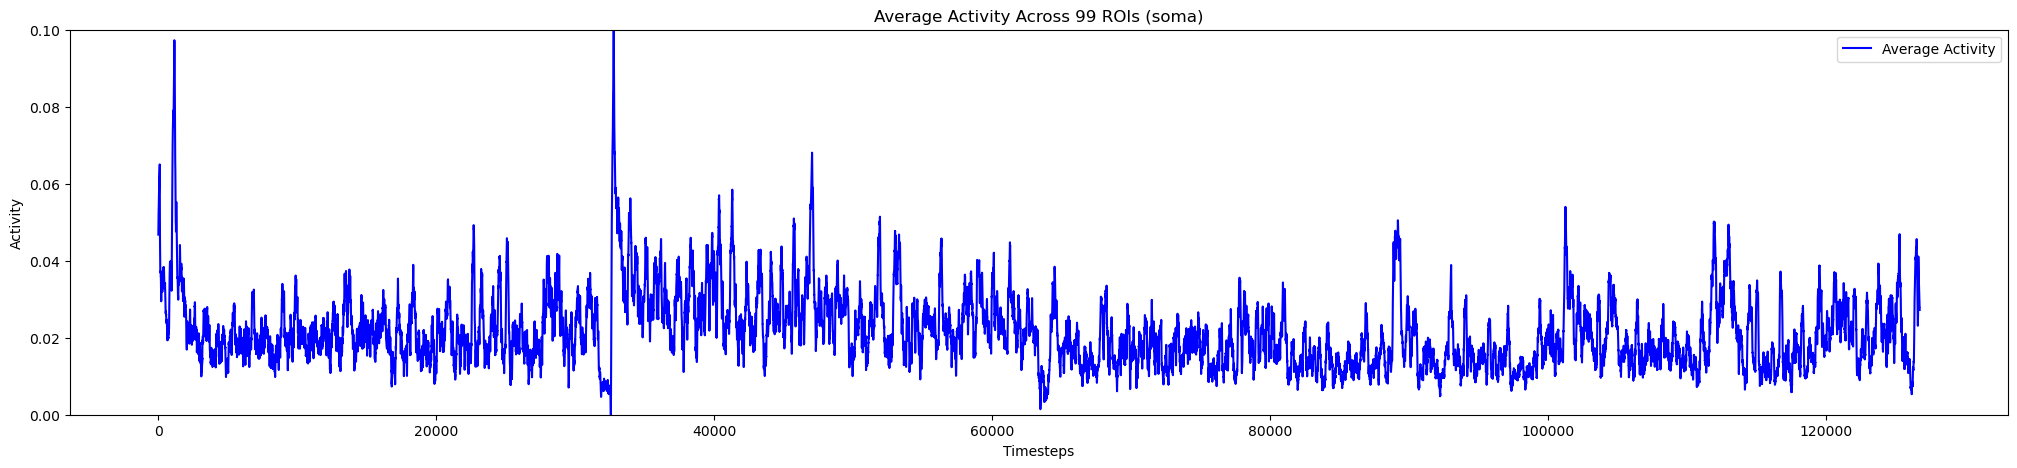

In [42]:


# Plotting the average across all ROIs
#average_activity = np.mean(avg_roi_data, axis=0)
plt.figure(figsize=(25, 5))
plt.plot(smooth_data(avg_roi_data), color='blue', label='Average Activity')
plt.title('Average Activity Across 99 ROIs (soma)')
plt.xlabel('Timesteps')
plt.ylim(0, 0.10)  # Set y-axis limits
plt.ylabel('Activity')
plt.legend()
plt.show()

In [4]:
is_module = op.get_data_interface("ImageSegmentation")
ps = is_module.plane_segmentations["PlaneSegmentation"]

In [22]:
ps

PlaneSegmentation pynwb.ophys.PlaneSegmentation at 0x140143278089312
Fields:
  colnames: ['image_mask' 'tracking_id']
  columns: (
    image_mask <class 'hdmf.common.table.VectorData'>,
    tracking_id <class 'hdmf.common.table.VectorData'>
  )
  description: Segmentation for imaging plane (de Vries et al., 2019, Nat Neurosci)
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x140143278481312
Fields:
  conversion: 1.0
  description: ImagingPlane
  device: 2p_microscope pynwb.device.Device at 0x140143278088496
Fields:
  description: Allen Institute two-photon pipeline: CAM2P.2

  excitation_lambda: 910.0
  imaging_rate: 30.0
  indicator: GCaMP6f
  location: {'area': 'VISp', 'depth': '375'}
  optical_channel: (
    optical_channel <class 'pynwb.ophys.OpticalChannel'>
  )
  reference_frame: Intrinsic imaging home
  unit: meters

In [5]:
roi_masks = ps.columns[0].data[:]

In [27]:
def calculate_roi_centroids(roi_masks):
    """
    Calculate the centroids of ROIs in the given mask array.

    Parameters:
    roi_masks (numpy.ndarray): A 3D numpy array of shape (num_rois, height, width)

    Returns:
    numpy.ndarray: A 2D array of centroids, shape (num_rois, 2), where each row contains [y, x] coordinates of the centroid.
    """
    num_rois = roi_masks.shape[0]
    centroids = np.zeros((num_rois, 2))

    for i in range(num_rois):
        roi = roi_masks[i]
        y_coords, x_coords = np.nonzero(roi)
        if len(y_coords) == 0 or len(x_coords) == 0:
            continue  # Skip if ROI is empty

        centroid_y = np.mean(y_coords)
        centroid_x = np.mean(x_coords)
        #centroids[i] = [normalize(centroid_y), normalize(centroid_x)]
        centroids[i] = [centroid_y, centroid_x]

    return centroids


In [31]:
centroids = calculate_roi_centroids(roi_masks)

In [32]:
def get_sinusoidal_encoding(x, y, num_dims):
    assert num_dims % 2 == 0, "Number of dimensions should be even"
    assert len(x) == len(y), "x and y arrays must be of the same length"

    # Creating scale factors that decrease exponentially
    scale_factors = 1 / np.power(10000, (2 * (np.arange(num_dims // 2)) / num_dims))

    # Initialize an array to hold the encodings for all positions
    all_encodings = np.zeros((len(x), num_dims * 2))
    #all_encodings = np.zeros((len(x), 64))

    # Apply sinusoidal encoding to each pair of positions
    for i, (pos_x, pos_y) in enumerate(zip(x, y)):
        encoding_x = np.array([np.sin(pos_x * scale_factors), np.cos(pos_x * scale_factors)]).flatten('F')
        encoding_y = np.array([np.sin(pos_y * scale_factors), np.cos(pos_y * scale_factors)]).flatten('F')
        all_encodings[i] = np.concatenate((encoding_x, encoding_y))

    return all_encodings

In [33]:
x = centroids[:, 0]
y = centroids[:, 1]
sinu_pos = get_sinusoidal_encoding(x,y,32)
print(sinu_pos.shape)

(99, 64)


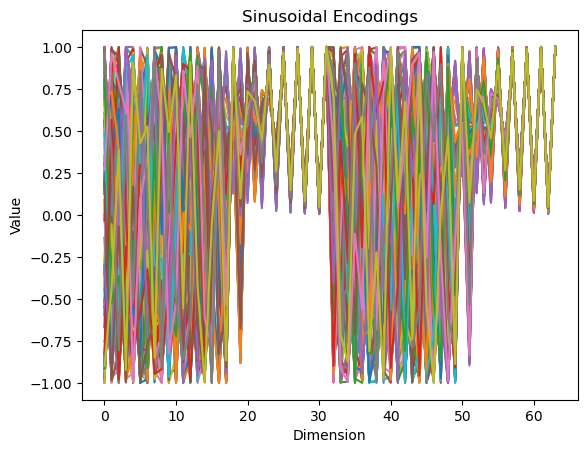

In [34]:
def plot_encodings(encodings):
    num_positions = encodings.shape[0]
    num_dims = encodings.shape[1]

    # Plot each encoding
    for i in range(num_positions):
        plt.plot(encodings[i], label=f'Position {i}')

    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title('Sinusoidal Encodings')
    #plt.legend()
    plt.show()

plot_encodings(sinu_pos)

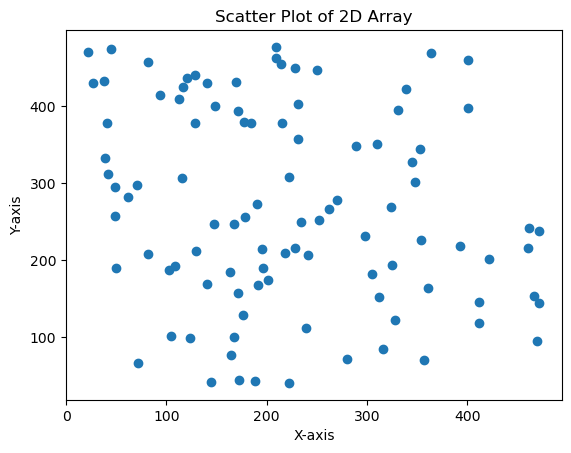

In [8]:


# Extracting x and y from the data
x = centroids[:, 0]
y = centroids[:, 1]

# Creating the scatter plot
plt.scatter(x, y)

# Adding title and labels (optional)
plt.title("Scatter Plot of 2D Array")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Display the plot
plt.show()

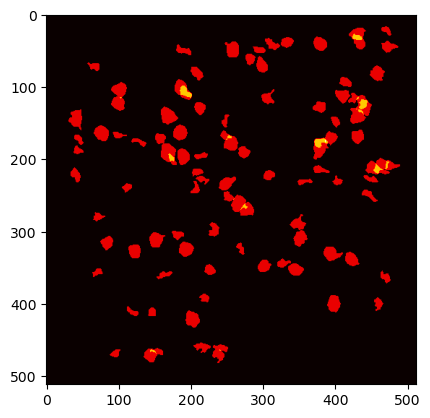

In [27]:
pos = np.sum(ps.columns[0].data[:], axis = 0)
heatmap = plt.imshow(pos, cmap='hot')

In [28]:
def calculate_roi_dimensions(roi_masks):
    num_rois = roi_masks.shape[0]
    areas = np.zeros(num_rois)
    heights = np.zeros(num_rois)
    widths = np.zeros(num_rois)

    for i in range(num_rois):
        roi = roi_masks[i]

        # Calculate area
        areas[i] = np.count_nonzero(roi)

        # Find rows and columns where ROI is present
        rows, cols = np.where(roi)
        if len(rows) == 0 or len(cols) == 0:
            continue  # Skip if ROI is empty

        # Calculate height and width
        heights[i] = np.max(rows) - np.min(rows) + 1
        widths[i] = np.max(cols) - np.min(cols) + 1

        # Normalize the arrays
        areas = normalize(areas)
        heights = normalize(heights)
        widths = normalize(widths)

    return areas, heights, widths

In [29]:
areas, heights, widths = calculate_roi_dimensions(roi_masks)

In [30]:
areas

array([0.00000000e+000, 5.82747299e-222, 2.10908320e-219, 2.67855444e-217,
       5.91960564e-215, 9.70815326e-213, 1.81542466e-210, 5.17396028e-208,
       1.75914649e-205, 1.89987821e-203, 5.16766874e-201, 1.20406682e-198,
       3.91321716e-196, 5.63503270e-194, 1.82011556e-191, 4.62309353e-189,
       9.19995613e-187, 3.11878513e-184, 3.74254215e-182, 8.72012322e-180,
       1.49114107e-177, 1.53587530e-175, 3.13318562e-173, 3.19584933e-171,
       5.46490235e-169, 6.28463770e-167, 8.98703192e-165, 2.46244675e-162,
       6.74710408e-160, 1.59231656e-157, 1.62416289e-155, 2.74483529e-153,
       3.51338917e-151, 4.81334317e-149, 5.96854553e-147, 1.00271565e-144,
       3.40923321e-142, 6.68209708e-140, 1.90439767e-137, 4.87525803e-135,
       7.11787673e-133, 2.10689151e-130, 2.29651175e-128, 3.16918621e-126,
       4.11994207e-124, 1.05058523e-121, 1.10311449e-119, 2.16210440e-117,
       2.35669380e-115, 8.05989279e-113, 1.53943952e-110, 3.83320441e-108,
       4.40818507e-106, 1

In [20]:

def plot_masks(roi_masks, num_to_plot=3):
    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_to_plot)))
    num_cols = int(np.ceil(num_to_plot / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i in range(min(num_to_plot, len(roi_masks))):
        ax = axes[i]
        ax.imshow(roi_masks[i]*1000, cmap='gray')
        ax.set_title(f'ROI {i+1}')
        ax.axis('off')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming roi_masks is your numpy array with shape (num_rois, 512, 512)
# plot_masks(roi_masks, num_to_plot=4)

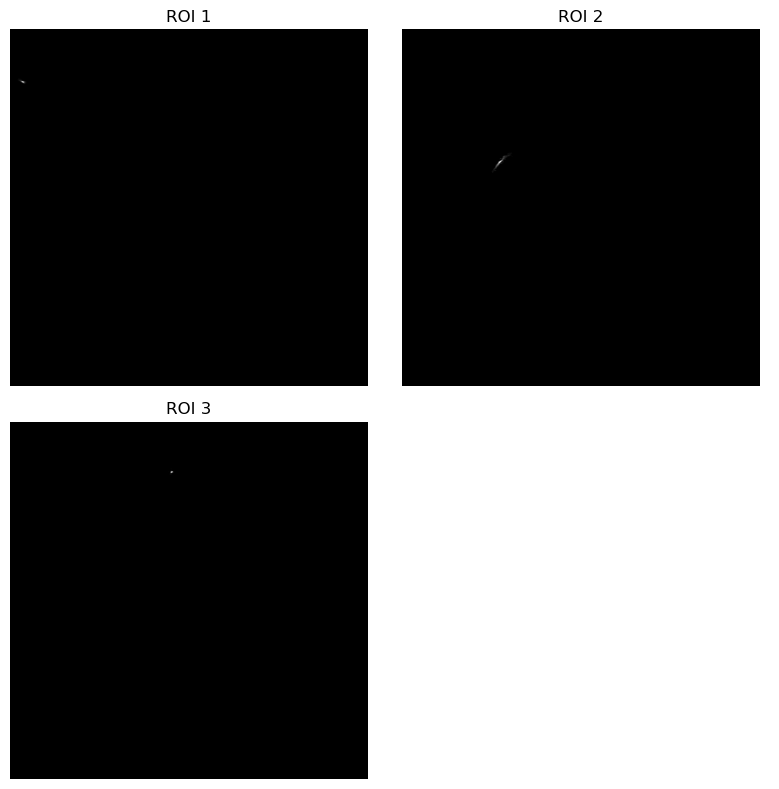

In [21]:
plot_masks(roi_masks)

## Helper functions

In [3]:

def calculate_roi_dimensions(roi_masks):
    num_rois = roi_masks.shape[0]
    areas = np.zeros(num_rois)
    heights = np.zeros(num_rois)
    widths = np.zeros(num_rois)

    for i in range(num_rois):
        roi = roi_masks[i]

        # Calculate area
        areas[i] = np.count_nonzero(roi)

        # Find rows and columns where ROI is present
        rows, cols = np.where(roi)
        if len(rows) == 0 or len(cols) == 0:
            continue  # Skip if ROI is empty

        # Calculate height and width
        heights[i] = np.max(rows) - np.min(rows) + 1
        widths[i] = np.max(cols) - np.min(cols) + 1

    return areas, heights, widths


def calculate_roi_centroids(roi_masks):
    """
    Calculate the centroids of ROIs in the given mask array.

    Parameters:
    roi_masks (numpy.ndarray): A 3D numpy array of shape (num_rois, height, width)

    Returns:
    numpy.ndarray: A 2D array of centroids, shape (num_rois, 2), where each row contains [y, x] coordinates of the centroid.
    """
    num_rois = roi_masks.shape[0]
    centroids = np.zeros((num_rois, 2))

    for i in range(num_rois):
        roi = roi_masks[i]
        y_coords, x_coords = np.nonzero(roi)
        if len(y_coords) == 0 or len(x_coords) == 0:
            continue  # Skip if ROI is empty

        centroid_y = np.mean(y_coords)
        centroid_x = np.mean(x_coords)
        centroids[i] = [centroid_y, centroid_x]

    return centroids

def plot_masks(roi_masks, num_to_plot=3):
    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_to_plot)))
    num_cols = int(np.ceil(num_to_plot / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i in range(min(num_to_plot, len(roi_masks))):
        ax = axes[i]
        ax.imshow(roi_masks[i], cmap='gray')
        ax.set_title(f'ROI {i+1}')
        ax.axis('off')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def getNWBfilenames(mouse_csv_path='/home/mila/x/xuejing.pan/thesis/mouse_df.csv'):
        filenames = []
        sess_ids = []
        num_rois = []
        lines = []
        planes = []
	
        df = pd.read_csv(mouse_csv_path, usecols = ['sessid','mouseid','runtype','nrois','line','plane'])

        #Getting all prod data
        for row, curr_type in enumerate(df.runtype):
            if curr_type == 'prod': 
                #f_name = source_dir+"/sub-"+str(df.mouseid[row])+"_ses-"+str(df.sessid[row])+"_obj-raw_behavior+image+ophys.nwb"
                f_name = "sub-"+str(df.mouseid[row])+"_ses-"+str(df.sessid[row])+"_obj-raw_behavior+image+ophys.nwb"
                filenames.append(f_name)
                sess_ids.append(df.sessid[row])
                num_rois.append(df.nrois[row])
                lines.append(df.line[row])
                planes.append(df.plane[row])

        return filenames,sess_ids, num_rois, lines, planes

In [5]:
def calculate_mean_stats(areas, heights, widths):
    mean_areas = [np.mean(session) for session in areas]
    mean_heights = [np.mean(session) for session in heights]
    mean_widths = [np.mean(session) for session in widths]
    return np.array(mean_areas), np.array(mean_heights), np.array(mean_widths)

## Iterate through all sessions

In [5]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
filenames,sess_ids, num_rois, lines, planes = getNWBfilenames()
file_nums = len(filenames)

In [6]:
areas = []
heights = []
widths = []

In [7]:
for count, file_name in enumerate(filenames):
    print("AT FILE: ", count) 
    print(file_name)

    io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
    nwbfile = io.read()

    op = nwbfile.processing["ophys"]
    df_over_f = op.get_data_interface("DfOverF")
    roi = df_over_f.roi_response_series["RoiResponseSeries"]

    is_module = op.get_data_interface("ImageSegmentation")
    ps = is_module.plane_segmentations["PlaneSegmentation"]

    roi_masks = ps.columns[0].data[:]

    curr_areas, curr_heights, curr_widths = calculate_roi_dimensions(roi_masks)

    areas.append(curr_areas)
    heights.append(curr_heights)
    widths.append(curr_widths)


AT FILE:  0
sub-408021_ses-758519303_obj-raw_behavior+image+ophys.nwb
AT FILE:  1
sub-408021_ses-759189643_obj-raw_behavior+image+ophys.nwb
AT FILE:  2
sub-408021_ses-759660390_obj-raw_behavior+image+ophys.nwb
AT FILE:  3
sub-411400_ses-759666166_obj-raw_behavior+image+ophys.nwb
AT FILE:  4
sub-411400_ses-759872185_obj-raw_behavior+image+ophys.nwb
AT FILE:  5
sub-411400_ses-760269100_obj-raw_behavior+image+ophys.nwb
AT FILE:  6
sub-411400_ses-761730740_obj-raw_behavior+image+ophys.nwb
AT FILE:  7
sub-411400_ses-762415169_obj-raw_behavior+image+ophys.nwb
AT FILE:  8
sub-411400_ses-763646681_obj-raw_behavior+image+ophys.nwb
AT FILE:  9
sub-411424_ses-761624763_obj-raw_behavior+image+ophys.nwb
AT FILE:  10
sub-411424_ses-761944562_obj-raw_behavior+image+ophys.nwb
AT FILE:  11
sub-411424_ses-762250376_obj-raw_behavior+image+ophys.nwb
AT FILE:  12
sub-411771_ses-760260459_obj-raw_behavior+image+ophys.nwb
AT FILE:  13
sub-411771_ses-760659782_obj-raw_behavior+image+ophys.nwb
AT FILE:  14
sub

In [8]:
areas[3]

array([ 88.,  59., 128.,  65.,  33., 122.,  81.,  79., 159.,  45., 165.,
        47., 118.,  82.,  59.,  29.,  24.,  55.,  80., 119., 156.,  50.,
       140.,  59.,  56.,  82., 303.,  39.,  51., 108.,  49.,  60.,  62.,
       115.,  57.,  47.,  75.,  76., 215.,  53., 137.,  17., 139.,  85.,
       110., 124.,  46.,  45.,  67.,  15.,  18.,  79.,  33., 153.,  33.,
        38.,  13., 168., 111.,  37.,  20.,  90.,  27.,  49.,  38., 221.,
       104., 282.,  54.,  82.,  14.,  80.,  60.,  38.,  53.,  24.,  80.,
        71.,  21.,  59.,  58.,  22.,  31.,  49.,  16.,  44.,  25.,  26.,
        18., 114., 167.,  20.,  16.,  55.,  68., 100., 110., 125.,  67.,
        21., 157.,  22., 102.,  89.,  55.,  27.,  25.,  30.,  24.,  14.,
        17.,  52., 112.,  26.,  26.,  50.,  53.,  67.,  80.,  27.,  18.,
        19.,  25.,  60.,  16.,  95.,  47.,  97., 234.,  44.,  73.,  73.,
        25.,  76.,  19.,  17.,  20.,  33.,  22.,  21.,  63.,  17.,  19.,
        44.,  57.,  19.,  28.,  41.,  64.,  21.,  2

In [8]:
#calculate the mean of each session

mean_areas, mean_heights, mean_widths = calculate_mean_stats(areas,heights,widths)

### Visualizing

 soma/dend

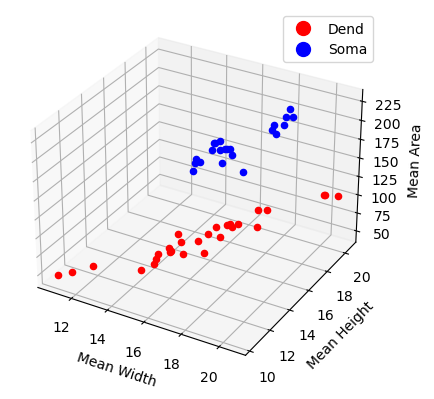

In [15]:
import matplotlib.lines as mlines
# Session types: 'dend' or 'soma'
# Assuming you have a list that indicates the type of each session
session_types = planes # e.g., ['dend', 'soma', 'dend', ...]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each session
for i in range(len(mean_areas)):
    x, y, z = mean_widths[i], mean_heights[i], mean_areas[i]  # Switch x and z
    color = 'r' if session_types[i] == 'dend' else 'b'
    label = 'Dend' if session_types[i] == 'dend' and i == 0 else 'Soma' if session_types[i] == 'soma' and i == 0 else ""
    ax.scatter(x, y, z, color=color, label=label)

# Create custom legends
dend_legend = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Dend')
soma_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Soma')

# Labeling axes
ax.set_xlabel('Mean Width')
ax.set_ylabel('Mean Height')
ax.set_zlabel('Mean Area')

# Legend
ax.legend(handles=[dend_legend, soma_legend])

# Show plot
plt.show()

In [11]:
mean_areas

array([177.10416667, 175.83783784, 171.98130841,  64.44373673,
        78.66782007,  70.92175573, 101.37619048, 102.22135008,
       102.81742044, 175.26436782, 172.41111111, 167.9       ,
       207.6       , 215.25714286, 221.24050633,  91.51585014,
        90.80907173,  83.42105263,  78.88662791,  76.8452381 ,
        69.952     ,  74.06050955,  72.72413793,  68.06445312,
       179.33333333, 156.88461538, 160.72413793,  70.84390244,
        60.10062893,  61.48351648,  47.32324622,  55.13666667,
        51.24624625,  65.75061125,  83.71685393,  79.78830645,
        74.90825688,  99.97929607,  98.41690962,  87.44726166,
       211.4040404 , 227.20689655, 222.89690722, 211.68181818,
       176.20089286, 173.91517857, 173.46190476, 162.91707317,
       163.26728111, 155.33039648])

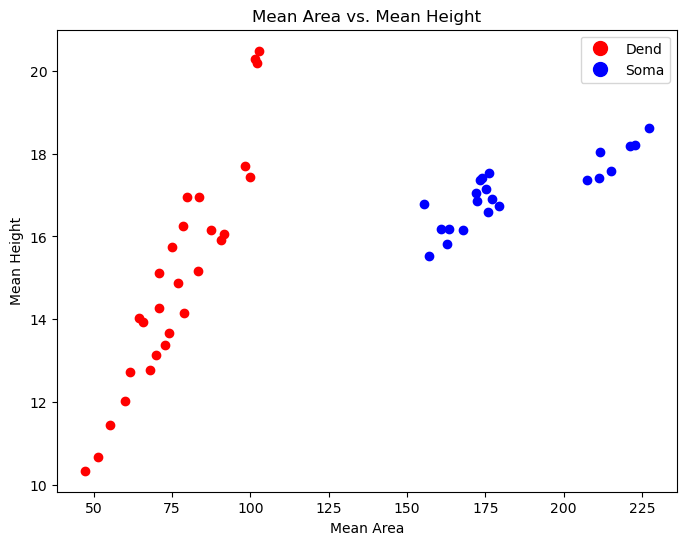

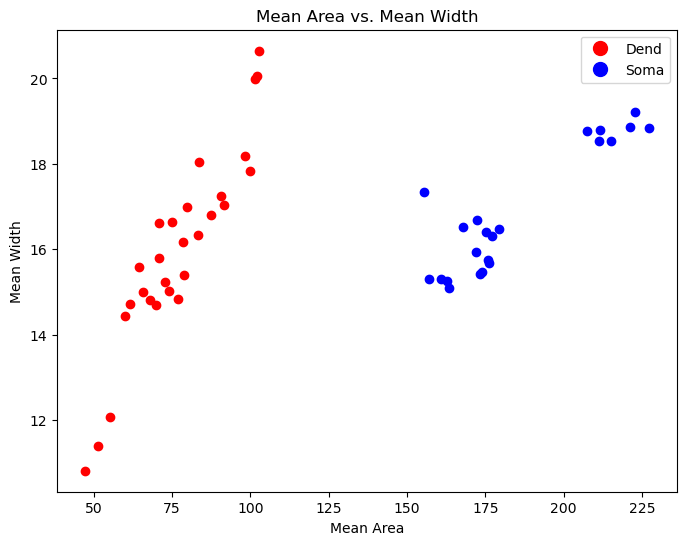

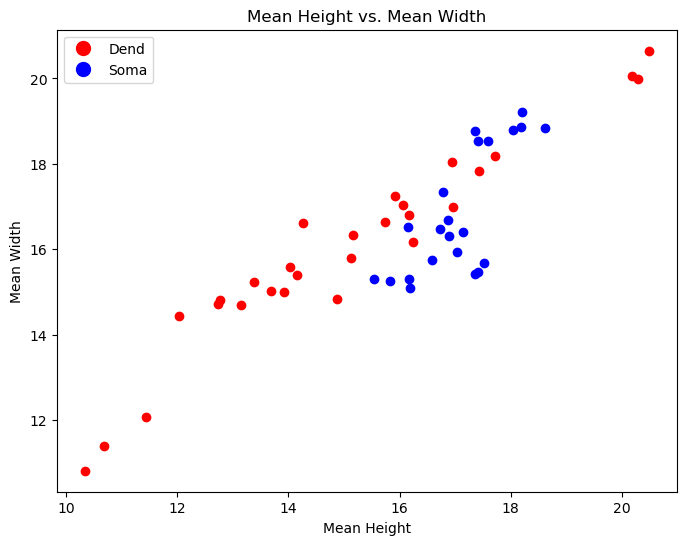

In [18]:

# Assuming mean_areas, mean_heights, and mean_widths are your data lists
# And session_types is a list indicating the type ('dend' or 'soma') for each session

# Plot 1: Mean Area vs. Mean Height
plt.figure(figsize=(8, 6))
for i in range(len(mean_areas)):
    color = 'r' if session_types[i] == 'dend' else 'b'
    label = 'Dend' if session_types[i] == 'dend' and i == 0 else 'Soma' if session_types[i] == 'soma' and i == 0 else ""
    plt.scatter(mean_areas[i], mean_heights[i], color=color, label=label)

# Create custom legends
dend_legend = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Dend')
soma_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Soma')

plt.xlabel('Mean Area')
plt.ylabel('Mean Height')
plt.title('Mean Area vs. Mean Height')
plt.legend(handles=[dend_legend, soma_legend])
plt.show()

# Plot 2: Mean Area vs. Mean Width
plt.figure(figsize=(8, 6))
for i in range(len(mean_areas)):
    color = 'r' if session_types[i] == 'dend' else 'b'
    label = 'Dend' if session_types[i] == 'dend' and i == 0 else 'Soma' if session_types[i] == 'soma' and i == 0 else ""
    plt.scatter(mean_areas[i], mean_widths[i], color=color, label=label)
plt.xlabel('Mean Area')
plt.ylabel('Mean Width')
plt.title('Mean Area vs. Mean Width')
plt.legend(handles=[dend_legend, soma_legend])
plt.show()

# Plot 3: Mean Height vs. Mean Width
plt.figure(figsize=(8, 6))
for i in range(len(mean_heights)):
    color = 'r' if session_types[i] == 'dend' else 'b'
    label = 'Dend' if session_types[i] == 'dend' and i == 0 else 'Soma' if session_types[i] == 'soma' and i == 0 else ""
    plt.scatter(mean_heights[i], mean_widths[i], color=color, label=label)
plt.xlabel('Mean Height')
plt.ylabel('Mean Width')
plt.title('Mean Height vs. Mean Width')
plt.legend(handles=[dend_legend, soma_legend])
plt.show()

Layer

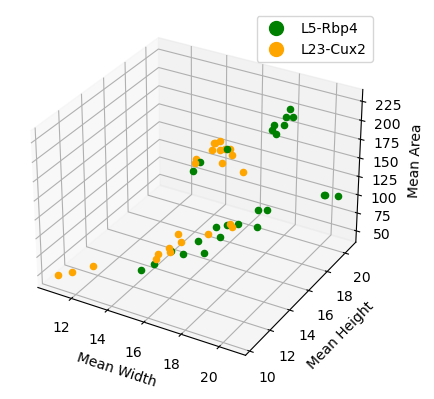

In [12]:
import matplotlib.lines as mlines
# Session types: 'dend' or 'soma'
# Assuming you have a list that indicates the type of each session
session_types = lines # e.g., ['dend', 'soma', 'dend', ...]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each session
for i in range(len(mean_areas)):
    x, y, z = mean_widths[i], mean_heights[i], mean_areas[i]  # Switch x and z
    color = 'g' if session_types[i] == 'L5-Rbp4' else 'orange'
    label = 'L5-Rbp4' if session_types[i] == 'L5-Rbp4' and i == 0 else 'Soma' if session_types[i] == 'L23-Cux2' and i == 0 else ""
    ax.scatter(x, y, z, color=color, label=label)

# Create custom legends
dend_legend = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='L5-Rbp4')
soma_legend = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='L23-Cux2')

# Labeling axes
ax.set_xlabel('Mean Width')
ax.set_ylabel('Mean Height')
ax.set_zlabel('Mean Area')

# Legend
ax.legend(handles=[dend_legend, soma_legend])

# Show plot
plt.show()

## ROI visualizaiton

In [3]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
#file_name = "sub-411771_ses-761269197_obj-raw_behavior+image+ophys.nwb"
file_name = 'sub-411400_ses-761730740_obj-raw_behavior+image+ophys.nwb'
io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
nwbfile = io.read()

In [52]:
op = nwbfile.processing["ophys"]
df_over_f = op.get_data_interface("DfOverF")
roi = df_over_f.roi_response_series["RoiResponseSeries"]
roi_data = roi.data

In [53]:
roi_data.shape

(126747, 630)

In [54]:
nwbfile

root pynwb.file.NWBFile at 0x140416411756000
Fields:
  acquisition: {
    motion_corrected_stack <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    2p_microscope <class 'pynwb.device.Device'>
  }
  file_create_date: [datetime.datetime(2022, 9, 25, 6, 46, 18, 315565, tzinfo=tzoffset(None, -25200))
 datetime.datetime(2023, 4, 5, 6, 5, 59, 678585, tzinfo=tzoffset(None, -25200))]
  identifier: 761730740_with_stim_and_stack
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Allen Institute for Brain Science
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Allen Institute OpenScope dataset
  session_id: 761730740
  session_start_time: 2018-10-09 17:50:37.303000-07:00
  stimulus: {
    gabors <class 'pynwb.image.IndexSeries'>,
    grayscreen <class 'pynwb.image.IndexSeries'>,
    visflow_left <class 'pynwb.image.IndexSeries'>,
    visflow_right <class 'pynwb.image.IndexSeries'>
  }
  stimulus_template: {
    gabors <class 'pynwb.image.ImageSeries'>,
    grayscreen <class 'pynwb.image.ImageSeries'>,
    visflow_left <class 'pynwb.image.ImageSeries'>,
    visflow_right <class 'pynwb.image.ImageSeries'>
  }
  subject: subject pynwb.file.Subject at 0x140416412116832
Fields:
  age: P90D
  genotype: Rbp4-Cre_KL100;Camk2a-tTA;Ai93
  sex: F
  species: Mus musculus
  subject_id: 411400

  timestamps_reference_time: 2018-10-09 17:50:37.303000-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

In [55]:
frames = nwbfile.acquisition["motion_corrected_stack"].data

In [56]:
frames.shape

(126747, 512, 512)

In [57]:
add_frames = np.sum(frames[:5000],axis=0)

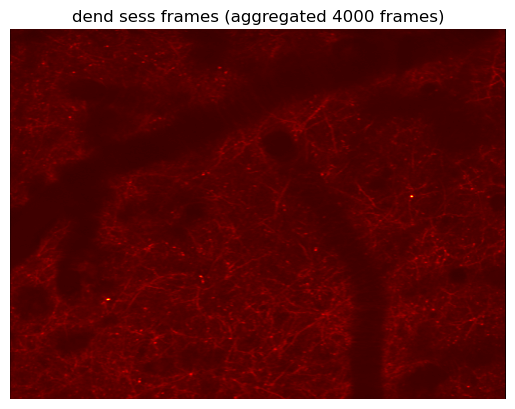

In [58]:

plt.imshow(add_frames, aspect='auto', cmap='hot')
#plt.colorbar(label='Aggregated Intensity')
#plt.xlabel('Width')
#plt.ylabel('Height')
plt.title('dend sess frames (aggregated 4000 frames)')
plt.axis('off')
plt.show()


In [59]:
IS = op.get_data_interface("ImageSegmentation")
PS = IS.plane_segmentations["PlaneSegmentation"]
pos = np.sum(PS.columns[0].data[:], axis = 0)
print(pos)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


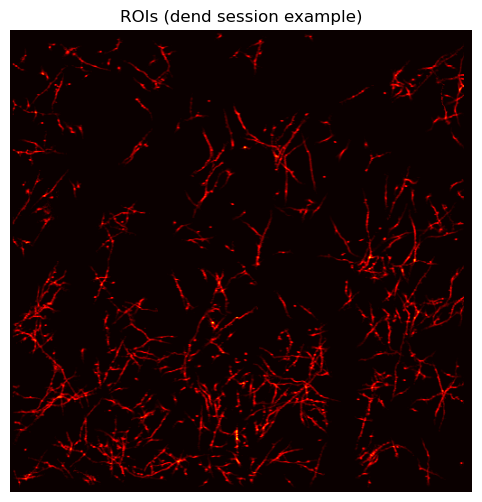

In [60]:
import matplotlib.pyplot as plt
# Create the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(pos, cmap='hot')

# Add color bar
#plt.colorbar(heatmap)

# Show the plot
plt.title('ROIs (dend session example)')
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.axis('off')
plt.show()

## all session stats

In [3]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
filenames,sess_ids, num_rois, lines, planes = getNWBfilenames()
file_nums = len(filenames)

In [11]:

all_areas = []
all_heights = []
all_widths = []

for count, file_name in enumerate(filenames):
    io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
    nwbfile = io.read()
    print(count)

    curr_sess_id = sess_ids[count]
    
    op = nwbfile.processing["ophys"]
    df_over_f = op.get_data_interface("DfOverF")
    roi = df_over_f.roi_response_series["RoiResponseSeries"]

    #adding ROI metadata
    is_module = op.get_data_interface("ImageSegmentation")
    ps = is_module.plane_segmentations["PlaneSegmentation"]

    roi_masks = ps.columns[0].data[:]

    #(num_rois, 2)
    roi_positions = calculate_roi_centroids(roi_masks)

    #(num_rois, )
    roi_areas, roi_heights, roi_widths = calculate_roi_dimensions(roi_masks)

    all_areas.append(roi_areas)
    all_heights.append(roi_heights)
    all_widths.append(roi_widths)

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [12]:

# Concatenate all areas, heights, and widths from 50 sessions
all_areas_arr = np.concatenate(all_areas, axis = 0)
all_heights_arr = np.concatenate(all_heights, axis = 0)
all_widths_arr = np.concatenate(all_widths, axis = 0)

In [15]:
print(all_areas_arr.shape)
print(all_heights_arr.shape)
print(all_widths_arr.shape)

(19115,)
(19115,)
(19115,)


In [14]:
print("area: {}, {}".format(np.min(all_areas_arr),np.max(all_areas_arr)))
print("height: {}, {}".format(np.min(all_heights_arr),np.max(all_heights_arr)))
print("width: {}, {}".format(np.min(all_widths_arr),np.max(all_widths_arr)))

area: 6.0, 1108.0
height: 1.0, 119.0
width: 3.0, 101.0


## Plotting timseries

In [6]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
filenames,sess_ids, num_rois, lines, planes = getNWBfilenames()
file_nums = len(filenames)

In [7]:
print(sess_ids)

[758519303, 759189643, 759660390, 759666166, 759872185, 760269100, 761730740, 762415169, 763646681, 761624763, 761944562, 762250376, 760260459, 760659782, 761269197, 763949859, 764897534, 765427689, 766755831, 767254594, 768807532, 764704289, 765193831, 766502238, 777496949, 778374308, 779152062, 777914830, 778864809, 779650018, 826187862, 826773996, 827833392, 826338612, 826819032, 828816509, 829283315, 823453391, 824434038, 825180479, 826659257, 827300090, 828475005, 829520904, 832883243, 833704570, 834403597, 836968429, 837360280, 838633305]


In [28]:
all_roi_data_dend = []
all_roi_data_soma = []
for count, file_name in enumerate(filenames):
    io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
    nwbfile = io.read()
    curr_sess_id = sess_ids[count]

    print(count)
    
    op = nwbfile.processing["ophys"]
    df_over_f = op.get_data_interface("DfOverF")
    roi = df_over_f.roi_response_series["RoiResponseSeries"]
    roi_data = roi.data[2000:25000]
    
    if planes[count] == 'dend':
        all_roi_data_dend.append(np.mean(roi_data, axis = 1))
    else:
        all_roi_data_soma.append(np.mean(roi_data, axis = 1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [29]:
all_roi_data_dend = np.array(all_roi_data_dend)
all_roi_data_soma = np.array(all_roi_data_soma)

In [30]:
all_roi_data_dend_avg = np.mean(all_roi_data_dend, axis = 0)
all_roi_data_soma_avg = np.mean(all_roi_data_soma, axis = 0)

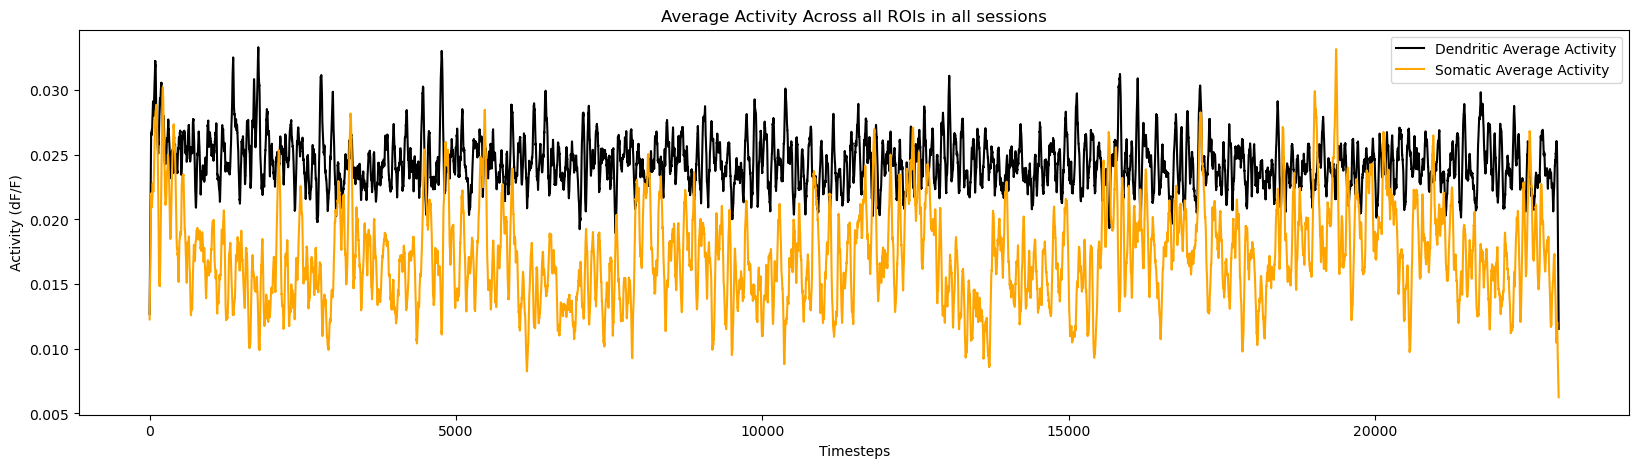

In [38]:

def smooth_data(data, window_size=50):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='same')

# Plotting the average across all ROIs
#average_activity = np.mean(avg_roi_data, axis=0)
plt.figure(figsize=(20, 5))
plt.plot(smooth_data(all_roi_data_dend_avg), color='black', label='Dendritic Average Activity')
plt.plot(smooth_data(all_roi_data_soma_avg), color='orange', label='Somatic Average Activity')
plt.title('Average Activity Across all ROIs in all sessions')
plt.xlabel('Timesteps')
#plt.ylim(0, 0.10)  # Set y-axis limits
plt.ylabel('Activity (dF/F)')
plt.legend()
plt.show()

## test stim

In [2]:
source_dir = "/network/projects/neuro-galaxy/data/raw/openscope_calcium"
#file_name = "sub-433451_ses-824434038_obj-raw_behavior+image+ophys.nwb"
file_name = "sub-433458_ses-826659257_obj-raw_behavior+image+ophys.nwb"
io = NWBHDF5IO(os.path.join(source_dir,file_name), mode="r")
nwbfile = io.read()

In [3]:
HEAVY_COLUMNS = ["start_time","stop_time","stimulus_type", "stimulus_template_name", 
                            "unexpected", 'gabor_frame',"gabor_mean_orientation", 
                            "start_frame_twop", "stop_frame_twop"]
stim_df = nwbfile.trials.to_dataframe()
stim_df = stim_df[HEAVY_COLUMNS]

In [17]:
#each entry is a sequence for visflow
vsfl_l_start_times = stim_df.loc[(stim_df['stimulus_template_name'] == 'visflow_left'), 'start_time']
vsfl_l_end_times =  stim_df.loc[(stim_df['stimulus_template_name'] == 'visflow_left'), 'stop_time']

vsfl_r_start_times = stim_df.loc[(stim_df['stimulus_template_name'] == 'visflow_right'), 'start_time']
vsfl_r_end_times =  stim_df.loc[(stim_df['stimulus_template_name'] == 'visflow_right'), 'stop_time']

if np.array(vsfl_l_start_times)[0] < np.array(vsfl_r_start_times)[0]:
    vsfl_start = np.append(vsfl_l_start_times,vsfl_r_start_times)
else:
    vsfl_start = np.append(vsfl_r_start_times,vsfl_l_start_times)

In [18]:
vsfl_start.shape

44.12086

In [ ]:
np.ones()